# Medical Data Visualizer
This is my solution for the Medical Data Visualizer project from FreeCodeCamp. Instructions for this project can be found [here](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer).

## Introduction
Reuploaded from Replit to GitHub and converted to Jupyter Notebook for easier access

The original upload on Replit with my previous attempts can be found [here](https://replit.com/@yemelgen/boilerplate-medical-data-visualizer).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('data/medical_examination.csv')

# Add 'overweight' column
BMI = df['weight'] / np.power( df['height'] / 100, 2 )
df['overweight'] = BMI.apply( lambda x: 1 if x > 25 else 0 )

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df[['cholesterol', 'gluc']] = df[['cholesterol', 'gluc']].applymap( lambda x: 0 if x == 1 else 1 )

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt( df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], id_vars=['cardio'] )

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    
    # Draw the catplot with 'sns.catplot()'
    graph = sns.catplot( data=df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar' )

    # Get the figure for the output
    fig = graph.fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[ 
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975)) ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu( np.ones_like( corr, dtype=bool ) )

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap( corr, mask=mask, annot=True, fmt='.1f' )

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

# Create a clas sto wrap the solution code
class MedicalDataVisualizer:
    def draw_cat_plot(self, *args, **kwargs):
        return draw_cat_plot()
    def draw_heat_map(self, *args, **kwargs):
        return draw_heat_map()
medical_data_visualizer = MedicalDataVisualizer()

In [2]:
# NOTE: Copied from test.module.py
import unittest
import matplotlib as mpl

# the test case
class CatPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = medical_data_visualizer.draw_cat_plot()
        self.ax = self.fig.axes[0]
    
    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "variable"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'variable'")
        actual = self.ax.get_ylabel()
        expected = "total"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'total'")
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
        self.assertEqual(actual, expected, "Expected bar plot secondary x labels to be 'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'")

    def test_bar_plot_number_of_bars(self):
        actual = len([rect for rect in self.ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])
        expected = 13
        self.assertEqual(actual, expected, "Expected a different number of bars chart.")


class HeatMapTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = medical_data_visualizer.draw_heat_map()
        self.ax = self.fig.axes[0]

    def test_heat_map_labels(self):
        actual = []
        for label in self.ax.get_xticklabels():
          actual.append(label.get_text())
        expected = ['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']
        self.assertEqual(actual, expected, "Expected heat map labels to be 'id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'.")
    
    def test_heat_map_values(self):
        actual = [text.get_text() for text in self.ax.get_default_bbox_extra_artists() if isinstance(text, mpl.text.Text)]
        print(actual)
        expected = ['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']
        self.assertEqual(actual, expected, "Expected different values in heat map.")

/home/yemel/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/yemel/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
./home/yemel/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
...
----------------------------------------------------------------------
Ran 4 tests in 6.010s

OK


['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']


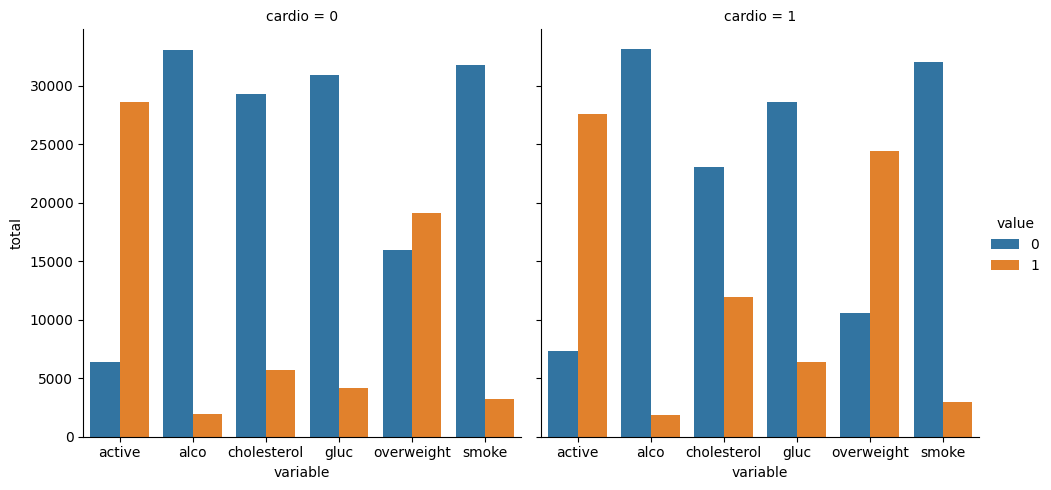

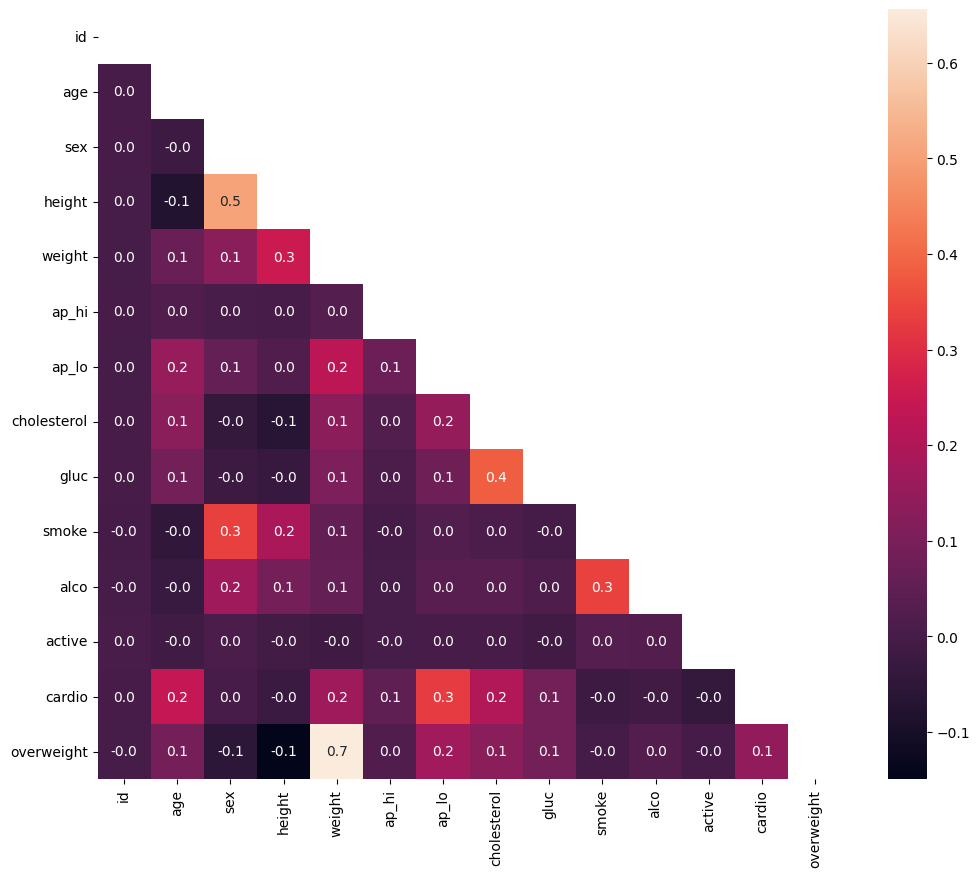

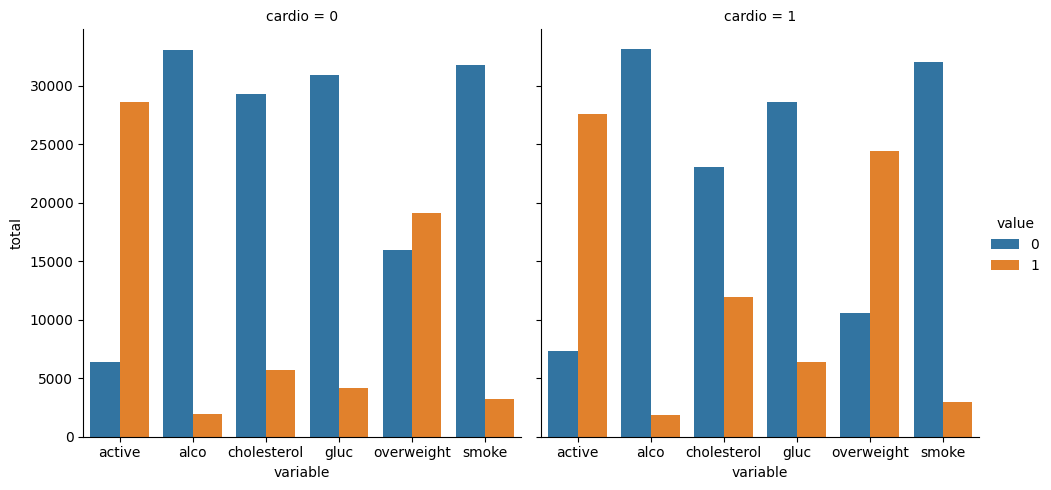

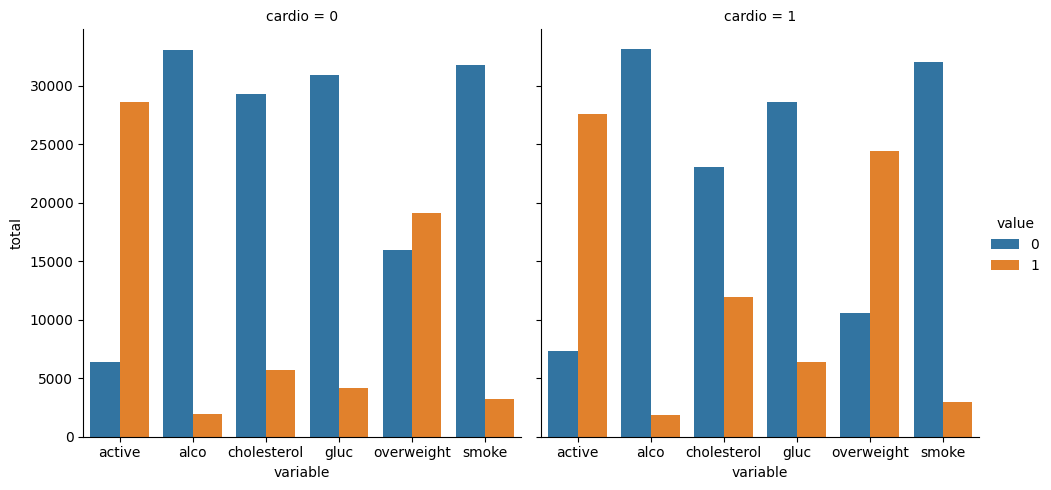

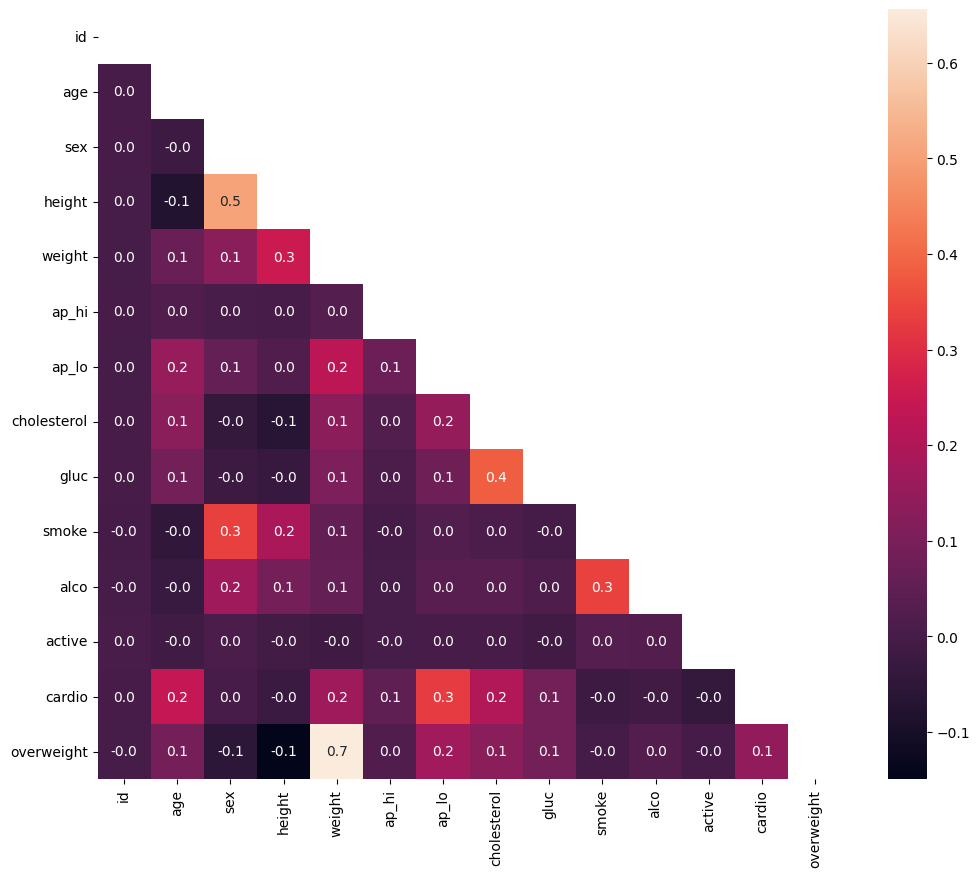

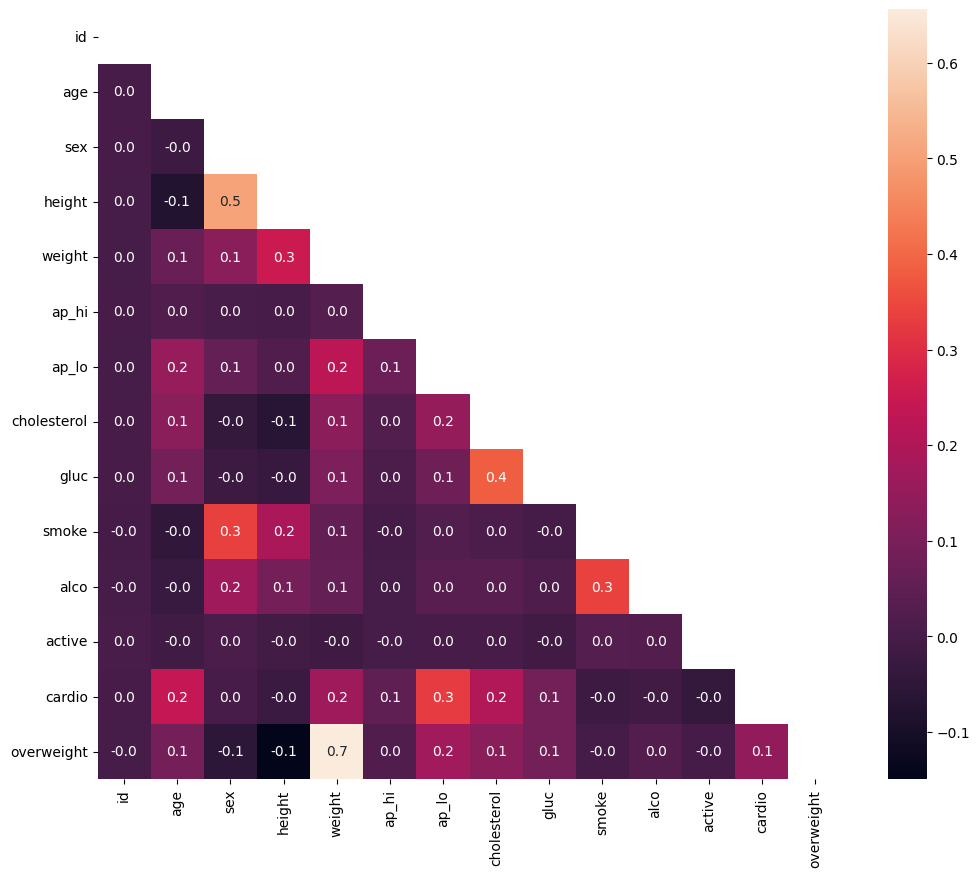

In [3]:
# NOTE: Copied rom main.py
# This entrypoint file to be used in development. Start by reading README.md
from unittest import main

# Test your function by calling it here
medical_data_visualizer.draw_cat_plot()
medical_data_visualizer.draw_heat_map()

# Run unit tests automatically
unittest.main(argv=[''], exit=False)